### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

cust_df = pd.read_csv("./train_santander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)


dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [4]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [5]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
cust_df['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [7]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [11]:
# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리. 
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.3, random_state=0)


### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))


[0]	validation_0-auc:0.82179	validation_1-auc:0.80068
[1]	validation_0-auc:0.83092	validation_1-auc:0.80941
[2]	validation_0-auc:0.83207	validation_1-auc:0.80903
[3]	validation_0-auc:0.83288	validation_1-auc:0.80889
[4]	validation_0-auc:0.83414	validation_1-auc:0.80924
[5]	validation_0-auc:0.83524	validation_1-auc:0.80907
[6]	validation_0-auc:0.83568	validation_1-auc:0.81004
[7]	validation_0-auc:0.83741	validation_1-auc:0.81088
[8]	validation_0-auc:0.83896	validation_1-auc:0.81305
[9]	validation_0-auc:0.83949	validation_1-auc:0.81363
[10]	validation_0-auc:0.83908	validation_1-auc:0.81277
[11]	validation_0-auc:0.83913	validation_1-auc:0.81260
[12]	validation_0-auc:0.84009	validation_1-auc:0.81325
[13]	validation_0-auc:0.84081	validation_1-auc:0.81329
[14]	validation_0-auc:0.84196	validation_1-auc:0.81380
[15]	validation_0-auc:0.84394	validation_1-auc:0.81540
[16]	validation_0-auc:0.84414	validation_1-auc:0.81573
[17]	validation_0-auc:0.84437	validation_1-auc:0.81577
[18]	validation_0-au

[149]	validation_0-auc:0.90457	validation_1-auc:0.83346
[150]	validation_0-auc:0.90465	validation_1-auc:0.83343
[151]	validation_0-auc:0.90469	validation_1-auc:0.83344
[152]	validation_0-auc:0.90482	validation_1-auc:0.83342
[153]	validation_0-auc:0.90501	validation_1-auc:0.83339
[154]	validation_0-auc:0.90513	validation_1-auc:0.83336
[155]	validation_0-auc:0.90518	validation_1-auc:0.83334
[156]	validation_0-auc:0.90525	validation_1-auc:0.83331
[157]	validation_0-auc:0.90531	validation_1-auc:0.83339
[158]	validation_0-auc:0.90549	validation_1-auc:0.83330
[159]	validation_0-auc:0.90559	validation_1-auc:0.83331
[160]	validation_0-auc:0.90574	validation_1-auc:0.83342
[161]	validation_0-auc:0.90592	validation_1-auc:0.83339
[162]	validation_0-auc:0.90598	validation_1-auc:0.83340
[163]	validation_0-auc:0.90601	validation_1-auc:0.83340
[164]	validation_0-auc:0.90629	validation_1-auc:0.83337
[165]	validation_0-auc:0.90641	validation_1-auc:0.83333
[166]	validation_0-auc:0.90652	validation_1-auc:

In [15]:
from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색. 

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1), 
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정. 
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.  
def objective_func(search_space):
    xgb_clf = XGBClassifier(n_estimators=100, max_depth=int(search_space['max_depth'])
                           , min_child_weight=int(search_space['min_child_weight'])
                            , colsample_bytree=search_space['colsample_bytree']
                            , learning_rate=search_space['learning_rate']
                           )
    
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric='auc'
                   , eval_set=[(X_tr, y_tr), (X_val, y_val)])
    
        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 


In [18]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[0]	validation_0-auc:0.73641	validation_1-auc:0.69861                           
[1]	validation_0-auc:0.75284	validation_1-auc:0.71875                           
[2]	validation_0-auc:0.81276	validation_1-auc:0.78335                           
[3]	validation_0-auc:0.82545	validation_1-auc:0.79690                           
[4]	validation_0-auc:0.83346	validation_1-auc:0.80340                           
[5]	validation_0-auc:0.83938	validation_1-auc:0.81157                           
[6]	validation_0-auc:0.83511	validation_1-auc:0.80456                           
[7]	validation_0-auc:0.84044	validation_1-auc:0.81013                           
[8]	validation_0-auc:0.83842	validation_1-auc:0.80757                           
[9]	validation_0-auc:0.83590	validation_1-auc:0.80661                           
[10]	validation_0-auc:0.84039	validation_1-auc:0.81095                          
[11]	validation_0-auc:0.84409	validation_1-auc:0.81470                          
[12]	validation_0-auc:0.8479

KeyboardInterrupt: 

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

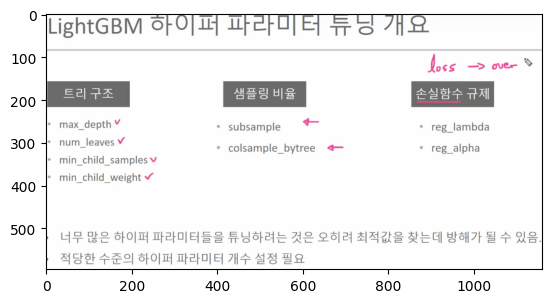

In [24]:
import matplotlib.image as img
import matplotlib.pyplot as pp

fileName = "sample14.png"
ndarray = img.imread(fileName)
pp.imshow(ndarray)
pp.show()

In [20]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc: 0.823733	valid_1's binary_logloss: 0.141592
[9]	training's a

[80]	training's auc: 0.930062	training's binary_logloss: 0.103185	valid_1's auc: 0.831212	valid_1's binary_logloss: 0.135846
[81]	training's auc: 0.93021	training's binary_logloss: 0.103035	valid_1's auc: 0.831221	valid_1's binary_logloss: 0.13587
[82]	training's auc: 0.930873	training's binary_logloss: 0.102757	valid_1's auc: 0.831112	valid_1's binary_logloss: 0.135917
[83]	training's auc: 0.931024	training's binary_logloss: 0.102636	valid_1's auc: 0.831065	valid_1's binary_logloss: 0.135936
[84]	training's auc: 0.931479	training's binary_logloss: 0.102405	valid_1's auc: 0.830915	valid_1's binary_logloss: 0.135993
[85]	training's auc: 0.931704	training's binary_logloss: 0.102221	valid_1's auc: 0.831007	valid_1's binary_logloss: 0.135984
[86]	training's auc: 0.931863	training's binary_logloss: 0.1021	valid_1's auc: 0.831073	valid_1's binary_logloss: 0.135943
[87]	training's auc: 0.932249	training's binary_logloss: 0.101879	valid_1's auc: 0.831022	valid_1's binary_logloss: 0.135962
[88]

In [21]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

eval_set=[(X_tr, y_tr), (X_val, y_val)]
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))
lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

[1]	training's auc: 0.82625	training's binary_logloss: 0.15523	valid_1's auc: 0.809814	valid_1's binary_logloss: 0.15774
[2]	training's auc: 0.833899	training's binary_logloss: 0.149581	valid_1's auc: 0.81222	valid_1's binary_logloss: 0.153275
[3]	training's auc: 0.841789	training's binary_logloss: 0.145416	valid_1's auc: 0.814833	valid_1's binary_logloss: 0.149999
[4]	training's auc: 0.847243	training's binary_logloss: 0.14212	valid_1's auc: 0.819406	valid_1's binary_logloss: 0.147524
[5]	training's auc: 0.849589	training's binary_logloss: 0.139438	valid_1's auc: 0.821869	valid_1's binary_logloss: 0.145464
[6]	training's auc: 0.853413	training's binary_logloss: 0.137254	valid_1's auc: 0.820878	valid_1's binary_logloss: 0.143973
[7]	training's auc: 0.85551	training's binary_logloss: 0.1354	valid_1's auc: 0.821815	valid_1's binary_logloss: 0.142746
[8]	training's auc: 0.858698	training's binary_logloss: 0.133561	valid_1's auc: 0.823733	valid_1's binary_logloss: 0.141592
[9]	training's a

[89]	training's auc: 0.933029	training's binary_logloss: 0.101427	valid_1's auc: 0.830847	valid_1's binary_logloss: 0.13606
[90]	training's auc: 0.933574	training's binary_logloss: 0.101132	valid_1's auc: 0.830845	valid_1's binary_logloss: 0.136074
[91]	training's auc: 0.933718	training's binary_logloss: 0.100966	valid_1's auc: 0.831067	valid_1's binary_logloss: 0.136028
[92]	training's auc: 0.933882	training's binary_logloss: 0.100834	valid_1's auc: 0.830966	valid_1's binary_logloss: 0.13606
[93]	training's auc: 0.934042	training's binary_logloss: 0.100677	valid_1's auc: 0.830691	valid_1's binary_logloss: 0.136126
[94]	training's auc: 0.934515	training's binary_logloss: 0.100417	valid_1's auc: 0.830759	valid_1's binary_logloss: 0.136153
[95]	training's auc: 0.934868	training's binary_logloss: 0.100212	valid_1's auc: 0.830436	valid_1's binary_logloss: 0.136221
[96]	training's auc: 0.935009	training's binary_logloss: 0.1001	valid_1's auc: 0.830566	valid_1's binary_logloss: 0.136227
[97]

In [22]:
def objective_func(search_space):
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']), 
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'])
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []
    
    # 3개 k-fold방식 적용 
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
    
    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되, 
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)

In [23]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출. 
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

[1]	training's auc: 0.82736	training's binary_logloss: 0.162294	valid_1's auc: 0.804818	valid_1's binary_logloss: 0.163544
[2]	training's auc: 0.828309	training's binary_logloss: 0.160269	valid_1's auc: 0.804585	valid_1's binary_logloss: 0.161866
[3]	training's auc: 0.833368	training's binary_logloss: 0.158478	valid_1's auc: 0.806871	valid_1's binary_logloss: 0.16038
[4]	training's auc: 0.834671	training's binary_logloss: 0.156852	valid_1's auc: 0.80706	valid_1's binary_logloss: 0.159053
[5]	training's auc: 0.837783	training's binary_logloss: 0.155354	valid_1's auc: 0.811645	valid_1's binary_logloss: 0.157793
[6]	training's auc: 0.839052	training's binary_logloss: 0.153966	valid_1's auc: 0.81271	valid_1's binary_logloss: 0.156635
[7]	training's auc: 0.841216	training's binary_logloss: 0.152691	valid_1's auc: 0.815103	valid_1's binary_logloss: 0.155585
[8]	training's auc: 0.841859	training's binary_logloss: 0.151499	valid_1's auc: 0.814773	valid_1's binary_logloss: 0.154617
[9]	training

[67]	training's auc: 0.876733	training's binary_logloss: 0.126457	valid_1's auc: 0.829943	valid_1's binary_logloss: 0.137148
[68]	training's auc: 0.877004	training's binary_logloss: 0.126282	valid_1's auc: 0.829954	valid_1's binary_logloss: 0.137083
[69]	training's auc: 0.87756	training's binary_logloss: 0.1261	valid_1's auc: 0.830128	valid_1's binary_logloss: 0.137018
[70]	training's auc: 0.87797	training's binary_logloss: 0.12593	valid_1's auc: 0.830009	valid_1's binary_logloss: 0.136959
[71]	training's auc: 0.878271	training's binary_logloss: 0.125757	valid_1's auc: 0.83006	valid_1's binary_logloss: 0.136874
[72]	training's auc: 0.878636	training's binary_logloss: 0.125587	valid_1's auc: 0.830076	valid_1's binary_logloss: 0.136826
[73]	training's auc: 0.879184	training's binary_logloss: 0.125399	valid_1's auc: 0.830085	valid_1's binary_logloss: 0.136789
[74]	training's auc: 0.879469	training's binary_logloss: 0.125237	valid_1's auc: 0.830075	valid_1's binary_logloss: 0.136732
[75]	t

[33]	training's auc: 0.861233	training's binary_logloss: 0.137451	valid_1's auc: 0.835552	valid_1's binary_logloss: 0.137215
[34]	training's auc: 0.861685	training's binary_logloss: 0.137067	valid_1's auc: 0.835533	valid_1's binary_logloss: 0.136967
[35]	training's auc: 0.862184	training's binary_logloss: 0.136698	valid_1's auc: 0.835406	valid_1's binary_logloss: 0.136728
[36]	training's auc: 0.862667	training's binary_logloss: 0.136338	valid_1's auc: 0.835312	valid_1's binary_logloss: 0.136482
[37]	training's auc: 0.862991	training's binary_logloss: 0.135983	valid_1's auc: 0.835197	valid_1's binary_logloss: 0.136257
[38]	training's auc: 0.863528	training's binary_logloss: 0.135648	valid_1's auc: 0.835072	valid_1's binary_logloss: 0.136031
[39]	training's auc: 0.864036	training's binary_logloss: 0.135331	valid_1's auc: 0.834926	valid_1's binary_logloss: 0.135828
[40]	training's auc: 0.86419	training's binary_logloss: 0.135015	valid_1's auc: 0.834894	valid_1's binary_logloss: 0.135611
[

[37]	training's auc: 0.860114	training's binary_logloss: 0.133199	valid_1's auc: 0.832296	valid_1's binary_logloss: 0.142265
[38]	training's auc: 0.860777	training's binary_logloss: 0.132855	valid_1's auc: 0.832378	valid_1's binary_logloss: 0.142016
[39]	training's auc: 0.861056	training's binary_logloss: 0.132533	valid_1's auc: 0.832541	valid_1's binary_logloss: 0.141797
[40]	training's auc: 0.861747	training's binary_logloss: 0.132224	valid_1's auc: 0.832606	valid_1's binary_logloss: 0.141578
[41]	training's auc: 0.862158	training's binary_logloss: 0.131929	valid_1's auc: 0.832747	valid_1's binary_logloss: 0.141381
[42]	training's auc: 0.862803	training's binary_logloss: 0.131641	valid_1's auc: 0.8327	valid_1's binary_logloss: 0.141179
[43]	training's auc: 0.863343	training's binary_logloss: 0.131354	valid_1's auc: 0.832837	valid_1's binary_logloss: 0.140985
[44]	training's auc: 0.86388	training's binary_logloss: 0.131084	valid_1's auc: 0.832996	valid_1's binary_logloss: 0.14079
[45]

[3]	training's auc: 0.857571	training's binary_logloss: 0.141216	valid_1's auc: 0.821962	valid_1's binary_logloss: 0.147259
[4]	training's auc: 0.861358	training's binary_logloss: 0.137643	valid_1's auc: 0.824181	valid_1's binary_logloss: 0.144869
[5]	training's auc: 0.866559	training's binary_logloss: 0.134811	valid_1's auc: 0.825962	valid_1's binary_logloss: 0.14308
[6]	training's auc: 0.869278	training's binary_logloss: 0.132436	valid_1's auc: 0.827506	valid_1's binary_logloss: 0.141548
[7]	training's auc: 0.872721	training's binary_logloss: 0.130404	valid_1's auc: 0.829742	valid_1's binary_logloss: 0.1403
[8]	training's auc: 0.876014	training's binary_logloss: 0.128648	valid_1's auc: 0.830458	valid_1's binary_logloss: 0.139332
[9]	training's auc: 0.878333	training's binary_logloss: 0.127071	valid_1's auc: 0.829403	valid_1's binary_logloss: 0.138713
[10]	training's auc: 0.880574	training's binary_logloss: 0.125698	valid_1's auc: 0.829365	valid_1's binary_logloss: 0.138082
[11]	train

[31]	training's auc: 0.919457	training's binary_logloss: 0.110746	valid_1's auc: 0.833293	valid_1's binary_logloss: 0.131479
[32]	training's auc: 0.920976	training's binary_logloss: 0.110085	valid_1's auc: 0.833202	valid_1's binary_logloss: 0.131461
[33]	training's auc: 0.922191	training's binary_logloss: 0.109456	valid_1's auc: 0.83292	valid_1's binary_logloss: 0.13157
[34]	training's auc: 0.923352	training's binary_logloss: 0.108908	valid_1's auc: 0.833192	valid_1's binary_logloss: 0.131535
[35]	training's auc: 0.924442	training's binary_logloss: 0.108369	valid_1's auc: 0.83302	valid_1's binary_logloss: 0.131592
[36]	training's auc: 0.925529	training's binary_logloss: 0.107831	valid_1's auc: 0.833198	valid_1's binary_logloss: 0.1316
[37]	training's auc: 0.926386	training's binary_logloss: 0.107369	valid_1's auc: 0.833276	valid_1's binary_logloss: 0.131619
[38]	training's auc: 0.927671	training's binary_logloss: 0.106787	valid_1's auc: 0.832651	valid_1's binary_logloss: 0.131748
[39]	

[11]	training's auc: 0.866724	training's binary_logloss: 0.135202	valid_1's auc: 0.826482	valid_1's binary_logloss: 0.142771
[12]	training's auc: 0.867727	training's binary_logloss: 0.134076	valid_1's auc: 0.826391	valid_1's binary_logloss: 0.142056
[13]	training's auc: 0.868857	training's binary_logloss: 0.133027	valid_1's auc: 0.827342	valid_1's binary_logloss: 0.14137
[14]	training's auc: 0.869679	training's binary_logloss: 0.132059	valid_1's auc: 0.828518	valid_1's binary_logloss: 0.140793
[15]	training's auc: 0.871776	training's binary_logloss: 0.131133	valid_1's auc: 0.828835	valid_1's binary_logloss: 0.140221
[16]	training's auc: 0.873402	training's binary_logloss: 0.130227	valid_1's auc: 0.828737	valid_1's binary_logloss: 0.139779
[17]	training's auc: 0.874229	training's binary_logloss: 0.129462	valid_1's auc: 0.828419	valid_1's binary_logloss: 0.139356
[18]	training's auc: 0.87588	training's binary_logloss: 0.128723	valid_1's auc: 0.829012	valid_1's binary_logloss: 0.138981
[1

[26]	training's auc: 0.883555	training's binary_logloss: 0.125961	valid_1's auc: 0.835858	valid_1's binary_logloss: 0.13208
[27]	training's auc: 0.884369	training's binary_logloss: 0.125451	valid_1's auc: 0.835428	valid_1's binary_logloss: 0.131989
[28]	training's auc: 0.885377	training's binary_logloss: 0.124981	valid_1's auc: 0.835452	valid_1's binary_logloss: 0.13185
[29]	training's auc: 0.886205	training's binary_logloss: 0.124531	valid_1's auc: 0.835686	valid_1's binary_logloss: 0.131779
[30]	training's auc: 0.88734	training's binary_logloss: 0.124051	valid_1's auc: 0.835626	valid_1's binary_logloss: 0.131672
[31]	training's auc: 0.888378	training's binary_logloss: 0.123597	valid_1's auc: 0.835459	valid_1's binary_logloss: 0.131575
[32]	training's auc: 0.889141	training's binary_logloss: 0.123168	valid_1's auc: 0.835337	valid_1's binary_logloss: 0.131481
[33]	training's auc: 0.890503	training's binary_logloss: 0.122676	valid_1's auc: 0.835828	valid_1's binary_logloss: 0.131353
[34

KeyboardInterrupt: 

In [ ]:
lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=int(best['num_leaves']),
                           max_depth=int(best['max_depth']),
                           min_child_samples=int(best['min_child_samples']), 
                           subsample=round(best['subsample'], 5),
                           learning_rate=round(best['learning_rate'], 5)
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행. 
lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=100, 
            eval_metric="auc",eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))